In [11]:
# Bisection 1
# Fixed Point Iteration - Might remove 2
# Secant 3
# Inverse Quadratic 4
# Brent's Method - Utilizes Bisection & inverse Quadratic 5
# Newton's 6
# False Position  7
# Steffensons using aitekens delta squared 8
# Muller's 9

In [86]:
# Import Section
import math
import time
import matplotlib.pyplot as plt

In [92]:
max_iters = 100000
tol = 1e-15
x = [lambda x: x**2 - x - 1, lambda x: x**3 - x**2 - x - 1,
             lambda x: x**4 - x**3 - x**2 - x - 1]
dx = []

Result: Success  Root: 1.618033988749895  Iterations: 49  Time taken: 0.0
[1.5, 1.75, 1.625, 1.5625, 1.59375, 1.609375, 1.6171875, 1.62109375, 1.619140625, 1.6181640625, 1.61767578125, 1.617919921875, 1.6180419921875, 1.61798095703125, 1.618011474609375, 1.6180267333984375, 1.6180343627929688, 1.6180305480957031, 1.618032455444336, 1.6180334091186523, 1.6180338859558105, 1.6180341243743896, 1.6180340051651, 1.6180339455604553, 1.6180339753627777, 1.618033990263939, 1.6180339828133583, 1.6180339865386486, 1.6180339884012938, 1.6180339893326163, 1.618033988866955, 1.6180339886341244, 1.6180339887505397, 1.618033988692332, 1.618033988721436, 1.6180339887359878, 1.6180339887432638, 1.6180339887469017, 1.6180339887487207, 1.6180339887496302, 1.618033988750085, 1.6180339887498576, 1.6180339887499713, 1.6180339887499144, 1.618033988749886, 1.6180339887499002, 1.6180339887498931, 1.6180339887498967, 1.618033988749895]



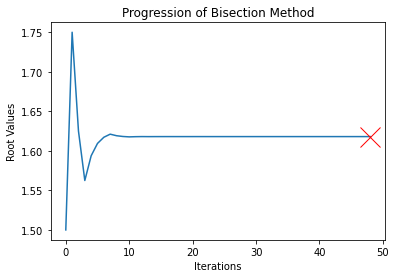

In [89]:
# Bisection Method
def bisection(f, p0, p1, tolerance, max_iter):
    progress = []
    FA = f(p0)
    for i in range(1, max_iter):
        p = p0 + (p1-p0)/2
        progress.append(p)
        FP = f(p)
        if (FP == 0) | ((p1-p0)/2 < tolerance):
            return "Success", p, i, progress
        if FA * FP > 0:
            p0 = p
            FA = FP
        else:
            p1 = p
    return "Failure", p, max_iter, progress

start = time.time()
result, root, iterations, progress = bisection(x[0], 1, 2, tol, max_iters)
end =  time.time()
print("Result:", result, " Root:", root, " Iterations:", iterations, " Time taken:", end-start)
print(progress)
print()

x = [i for i in range(len(progress))]
plt.plot(x, progress)
plt.plot(len(progress)-1, (1+math.sqrt(5))/2, marker="x", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.title('Progression of Bisection Method')
plt.xlabel('Iterations')
plt.ylabel('Root Values')
plt.show()

Result: Failure  Root: -1  Iterations: 100000  Time taken: 0.025931119918823242
[1.5, 1.6, 1.6190476190476188, 1.6180257510729612, 1.618033985017358, 1.6180339887499087, 1.6180339887498947, 1.6180339887498947]



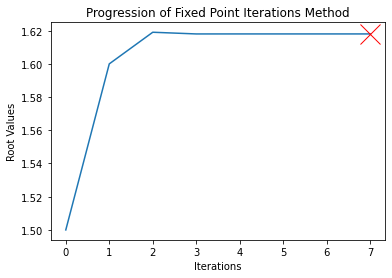

In [96]:
# Fixed Point Iteration Method
def fixedPointIteration(g, p0, tol, max_iter):
    for i in range(1, max_iter):
        p = g(p0)
        if abs(p-p0) < tol:
            return "Success", p, i, progress
        p0 = p
    return "Failure", p, max_iter, progress

start = time.time()
result, root, iterations, progress = fixedPointIteration(x[0], 1, tol, max_iters)
end =  time.time()
print("Result:", result, " Root:", root, " Iterations:", iterations, " Time taken:", end-start)
print(progress)
print()

X = [i for i in range(len(progress))]
plt.plot(X, progress)
plt.plot(len(progress)-1, (1+math.sqrt(5))/2, marker="x", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.title('Progression of Fixed Point Iterations Method')
plt.xlabel('Iterations')
plt.ylabel('Root Values')
plt.show()

Result: Success  Root: 1.6180339887498947  Iterations: 9  Time taken: 0.0
[1.5, 1.6, 1.6190476190476188, 1.6180257510729612, 1.618033985017358, 1.6180339887499087, 1.6180339887498947, 1.6180339887498947]



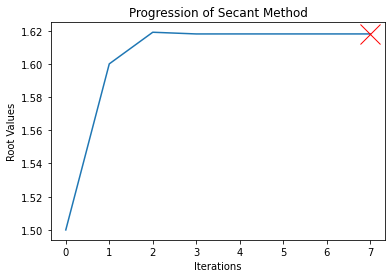

In [95]:
# Secant Method
def secant(f, p0, p1, tolerance, max_iter):
    progress = []
    q0 = f(p0)
    q1 = f(p1)
    for i in range(2, max_iter):
        p = p1 - (q1*(p1-p0))/(q1-q0)
        progress.append(p)
        if abs(p - p1) < tolerance:
            return "Success", p, i, progress
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
    return "Failure", p, max_iter, progress

start = time.time()
result, root, iterations, line = secant(eq[0], 1, 2, tol, max_iters)
end =  time.time()
print("Result:", result, " Root:", root, " Iterations:", iterations, " Time taken:", end-start)
print(line)
print()

x = [i for i in range(len(progress))]
plt.plot(x, progress)
plt.plot(len(progress)-1, (1+math.sqrt(5))/2, marker="x", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.title('Progression of Secant Method')
plt.xlabel('Iterations')
plt.ylabel('Root Values')
plt.show()

Result: Success  Root: 1.6180339887498947  Iterations: 9  Time taken: 0.0
[2.166666666666667, 2.307692307692308, 1.4324409201538824, 1.602354712801274, 1.618647548167799, 1.6180348115006353, 1.6180339887466966, 1.6180339887498947, 1.6180339887498947]



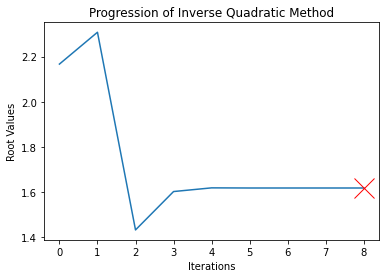

In [107]:
# Inverse Quadratic - Similar to the Secant Method / A derivation from the Secant Method
def inverseQuadratic(f, x0, x1, x2, tolerance, max_iter):
    progress = []
    for i in range(max_iter):
        if abs(x1-x0) > tolerance: # last guess and new guess are v close
            L0 = (x0 * f(x1) * f(x2)) / ((f(x0) - f(x1)) * (f(x0) - f(x2)))
            L1 = (x1 * f(x0) * f(x2)) / ((f(x1) - f(x0)) * (f(x1) - f(x2)))
            L2 = (x2 * f(x1) * f(x0)) / ((f(x2) - f(x0)) * (f(x2) - f(x1)))
            new = L0 + L1 + L2
            x0, x1, x2 = new, x0, x1
            progress.append(x0)
        else:
            return "Success", x0, i, progress
    return "Failure", x0, max_iter, progress

start = time.time()
result, root, iterations, line = inverseQuadratic(x[0], .5, 1, 2, tol, max_iters)
end =  time.time()
print("Result:", result, " Root:", root, " Iterations:", iterations, " Time taken:", end-start)
print(line)
print()

x = [i for i in range(len(progress))]
plt.plot(x, progress)
plt.plot(len(progress)-1, (1+math.sqrt(5))/2, marker="x", markersize=20, markeredgecolor="red", markerfacecolor="green")
plt.title('Progression of Inverse Quadratic Method')
plt.xlabel('Iterations')
plt.ylabel('Root Values')
plt.show()

In [ ]:
def brents(f, p0, p1, tolerance, max_iter):
    assert (f(p0) * f(p1) <= 0, "Root not bracketed"

    if abs(fx0) < abs(fx1):
        x0, x1 = x1, x0
        fx0, fx1 = fx1, fx0

    x2, fx2 = x0, fx0

    mflag = True
    steps_taken = 0

    while steps_taken < max_iter and abs(x1-x0) > tolerance:
        fx0 = f(x0)
        fx1 = f(x1)
        fx2 = f(x2)

        if fx0 != fx2 and fx1 != fx2:
            L0 = (x0 * fx1 * fx2) / ((fx0 - fx1) * (fx0 - fx2))
            L1 = (x1 * fx0 * fx2) / ((fx1 - fx0) * (fx1 - fx2))
            L2 = (x2 * fx1 * fx0) / ((fx2 - fx0) * (fx2 - fx1))
            new = L0 + L1 + L2

        else:
            new = x1 - ( (fx1 * (x1 - x0)) / (fx1 - fx0) )

        if ((new < ((3 * x0 + x1) / 4) or new > x1) or
            (mflag == True and (abs(new - x1)) >= (abs(x1 - x2) / 2)) or
            (mflag == False and (abs(new - x1)) >= (abs(x2 - d) / 2)) or
            (mflag == True and (abs(x1 - x2)) < tolerance) or
            (mflag == False and (abs(x2 - d)) < tolerance)):
            new = (x0 + x1) / 2
            mflag = True

        else:
            mflag = False

        fnew = f(new)
        d, x2 = x2, x1

        if (fx0 * fnew) < 0:
            x1 = new
        else:
            x0 = new

        if abs(fx0) < abs(fx1):
            x0, x1 = x1, x0

        steps_taken += 1

    return x1, steps_taken

root, steps = brents(eq[0], 1, 2, tolerance=10e-16)
print(root, steps)

In [14]:
# https://personal.math.ubc.ca/~pwalls/math-python/roots-optimization/newton/
# Newton's method
def newton(f,Df,x0,epsilon):
    iterations = 0
    xn = x0
    for n in range(0, 1000):
        iterations += 1
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn, iterations
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None, None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None, None

for i in range(len(eq)):
    start = time.time()
    approx, iteration = newton(eq[i], df[i], 1, 1e-10)
    end =  time.time()
    print(approx, iteration)
    print(end-start)
    print()

Found solution after 5 iterations.
1.618033988749989 6
0.0

Zero derivative. No solution found.
None None
0.0

Found solution after 7 iterations.
-0.7748041132154339 8
0.000997304916381836



In [15]:
# https://personal.math.ubc.ca/~pwalls/math-python/roots-optimization/secant/
# Secant Method
def secant(f,a,b):
    iterations = 0
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None, None
    a_n = a
    b_n = b
    for n in range(1, 1000):
        iterations += 1
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n, iterations
        else:
            print("Secant method fails.")
            return None, None
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n)), iterations

for i in eq:
    start = time.time()
    approx, iteration = secant(i, 1, 2)
    end =  time.time()
    print(approx)
    print(iteration)
    print(end-start)
    print()

Found exact solution.
1.618033988749895
19
0.00049591064453125

1.8392867552141612
999
0.00148773193359375

1.9275619754829252
999
0.0024802684783935547



In [17]:
# False Position Method
def falseposition(f,  a , b):
    iterations = 0
    if f(a) * f(b) >= 0:
        print("You have not assumed right a and b")
        return None, None
    c = a # Initialize result
    for i in range(1000):
        iterations += 1
        # Find the point that touches x axis
        c = (a * f(b) - b * f(a))/ (f(b) - f(a))
        # Check if the above found point is root
        if f(c) == 0:
            break
        # Decide the side to repeat the steps
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return c, iterations

for i in eq:
    start = time.time()
    approx, iteration = falseposition(i, 1, 2)
    end =  time.time()
    print(approx)
    print(iteration)
    print(end-start)
    print()

1.618033988749895
19
0.0

1.8392867552141612
1000
0.001984119415283203

1.9275619754829252
1000
0.002975940704345703

